# DD2412 Final Project - Basic Implementation CIFAR100


In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd drive/MyDrive/Github/AdvanceDL_Poject_Group9/
except:
    print("Unable to connect to google drive")

Unable to connect to google drive


In [2]:
# Import general packages
import os
import copy
import matplotlib.pyplot as plt
import numpy as np

# Variables
%matplotlib inline

In [3]:
# Tensorflow versions
import tensorflow as tf

# Handle not pre-installed packages 
try: 
    import tensorflow_addons as tfa
except:
    os.system("pip install tensorflow-addons")
    import tensorflow_addons as tfa

try: 
    import optuna
except:
    os.system("pip install optuna")
    import optuna

# Print TensorFlow versions
print("TensorFlow version:", tf.__version__)
print("TensorFlow Addon version:", tfa.__version__)

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

TensorFlow version: 2.8.3
TensorFlow Addon version: 0.18.0


In [4]:
import self_classifier as sc

## Config

In [5]:
# Create config variable
config = {
    # Data Parameter
    'DATASET' : tf.keras.datasets.cifar100,
    'IMAGE_SHAPE' : (32,32,3),
    'IMAGE_SIZE' : 32, 
    'BATCH_SIZE' : 64,
    'CLASS_COUNT' : 100,
    'N_AUG' : 2,
    # Training parameters
    'LR_SCHED' : "WarmUpCosineDecay",
    'OPTIM' : tf.keras.optimizers.Adam(),
    'EPOCHS' : 20,
    'MAX_LR' : 0.005,
}

## Data Loading and Augmentation

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

#Pre-process the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(x_train.shape[0]).batch(config['BATCH_SIZE'])
    
test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)).batch(config['BATCH_SIZE'])

In [8]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomContrast(0.2),
  layers.RandomZoom(.5, .2)
])

In [9]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization,InputLayer
from tensorflow.keras.layers import UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.activations import softmax
from tensorflow.keras import Model, Sequential


class PretrainedModel(sc.CustomModel):
    def __init__(self, pre_model, activation, input_shape, output_shape):
        super(PretrainedModel, self).__init__()

        if pre_model == "ResNet50":
            base_model = tf.keras.applications.resnet50.ResNet50(
                weights='imagenet', include_top=False,
                input_shape=(224,224,3))

        elif pre_model == "EfficientNetB0":
            base_model = tf.keras.applications.efficientnet.EfficientNetB0(
                weights='imagenet', include_top=False,
                input_shape=input_shape)

        elif pre_model == "EfficientNetB1":
            base_model = tf.keras.applications.efficientnet.EfficientNetB1(
                weights='imagenet', include_top=False,
                input_shape=input_shape)

        elif pre_model == "MobileNet":
            base_model = tf.keras.applications.mobilenet.MobileNet(
                weights='imagenet', include_top=False,
                input_shape=input_shape)

        for layer in base_model.layers:
            layer.trainable = False

        # Output layer
        model = Sequential()
        model.add(data_augmentation)
        model.add(UpSampling2D(size=(7,7)))

        model.add(base_model)
        
        model.add(GlobalAveragePooling2D())
        model.add(Dense(256, activation=activation))
        model.add(Dropout(.25))
        model.add(BatchNormalization())
        model.add(Dense(output_shape, activation='softmax'))

        self.model = model


## Train Network

============================== EPOCH 1 ==============================


Validation: 100%|██████████| 157/157 [01:25<00:00,  1.83it/s]


Epoch 1, Learning Rate: 0.00494, Epoch time: 489.49 seconds
Loss: 4.352, Valid Loss: 3.9907, NMI: 0.8060, AMI: 0.0507, ARI: 0.0374, ACC: 0.4345, 
============================== EPOCH 2 ==============================


Validation: 100%|██████████| 157/157 [01:19<00:00,  1.97it/s]


Epoch 2, Learning Rate: 0.00482, Epoch time: 479.70 seconds
Loss: 4.104, Valid Loss: 3.9548, NMI: 0.8075, AMI: 0.0436, ARI: 0.0324, ACC: 0.4388, 
============================== EPOCH 3 ==============================


Validation: 100%|██████████| 157/157 [01:25<00:00,  1.84it/s]


Epoch 3, Learning Rate: 0.00464, Epoch time: 511.80 seconds
Loss: 4.067, Valid Loss: 3.9271, NMI: 0.8106, AMI: 0.0454, ARI: 0.0346, ACC: 0.4415, 
============================== EPOCH 4 ==============================


Validation: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


Epoch 4, Learning Rate: 0.00442, Epoch time: 488.60 seconds
Loss: 4.049, Valid Loss: 3.9284, NMI: 0.8066, AMI: 0.0498, ARI: 0.0377, ACC: 0.4332, 
============================== EPOCH 5 ==============================


Validation: 100%|██████████| 157/157 [01:18<00:00,  2.00it/s]


Epoch 5, Learning Rate: 0.00414, Epoch time: 477.76 seconds
Loss: 4.037, Valid Loss: 3.9263, NMI: 0.8071, AMI: 0.0487, ARI: 0.0364, ACC: 0.4399, 


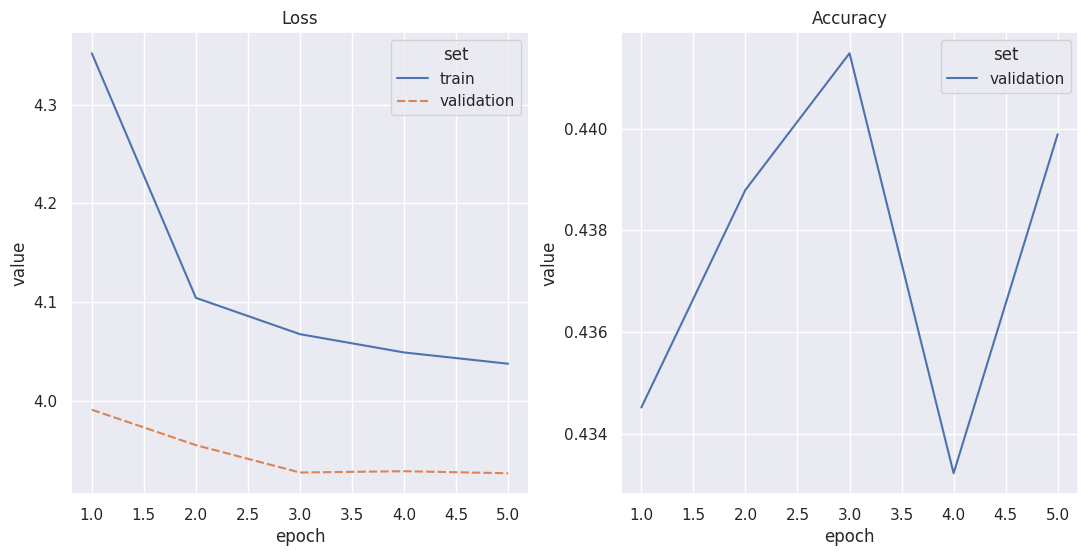

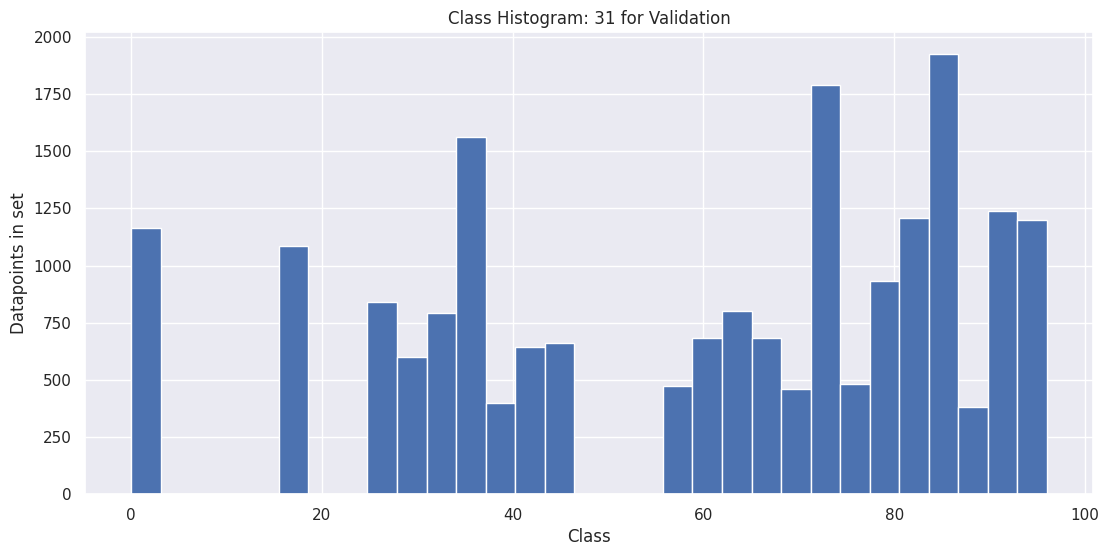

Class list:  [(0.0, 1166), (17.0, 630), (18.0, 454), (27.0, 840), (30.0, 600), (33.0, 792), (36.0, 1080), (37.0, 484), (38.0, 400), (41.0, 644), (44.0, 660), (58.0, 474), (61.0, 682), (63.0, 800), (68.0, 682), (71.0, 460), (72.0, 626), (73.0, 622), (74.0, 540), (77.0, 482), (78.0, 610), (79.0, 322), (82.0, 720), (83.0, 488), (85.0, 496), (86.0, 1428), (88.0, 382), (90.0, 718), (92.0, 520), (95.0, 542), (96.0, 656)]
============================== EPOCH 6 ==============================


Validation: 100%|██████████| 157/157 [01:22<00:00,  1.91it/s]


Epoch 6, Learning Rate: 0.00383, Epoch time: 480.00 seconds
Loss: 4.025, Valid Loss: 3.9123, NMI: 0.8124, AMI: 0.0545, ARI: 0.0413, ACC: 0.4449, 
============================== EPOCH 7 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 7, Learning Rate: 0.00348, Epoch time: 474.50 seconds
Loss: 4.019, Valid Loss: 3.9032, NMI: 0.8114, AMI: 0.0499, ARI: 0.0386, ACC: 0.4446, 
============================== EPOCH 8 ==============================


Validation: 100%|██████████| 157/157 [02:22<00:00,  1.11it/s]


Epoch 8, Learning Rate: 0.00311, Epoch time: 567.25 seconds
Loss: 4.011, Valid Loss: 3.8960, NMI: 0.8093, AMI: 0.0480, ARI: 0.0365, ACC: 0.4413, 
============================== EPOCH 9 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 9, Learning Rate: 0.00272, Epoch time: 485.58 seconds
Loss: 4.004, Valid Loss: 3.8912, NMI: 0.8092, AMI: 0.0440, ARI: 0.0336, ACC: 0.4377, 
============================== EPOCH 10 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 10, Learning Rate: 0.00233, Epoch time: 457.74 seconds
Loss: 3.999, Valid Loss: 3.8954, NMI: 0.8101, AMI: 0.0502, ARI: 0.0388, ACC: 0.4404, 


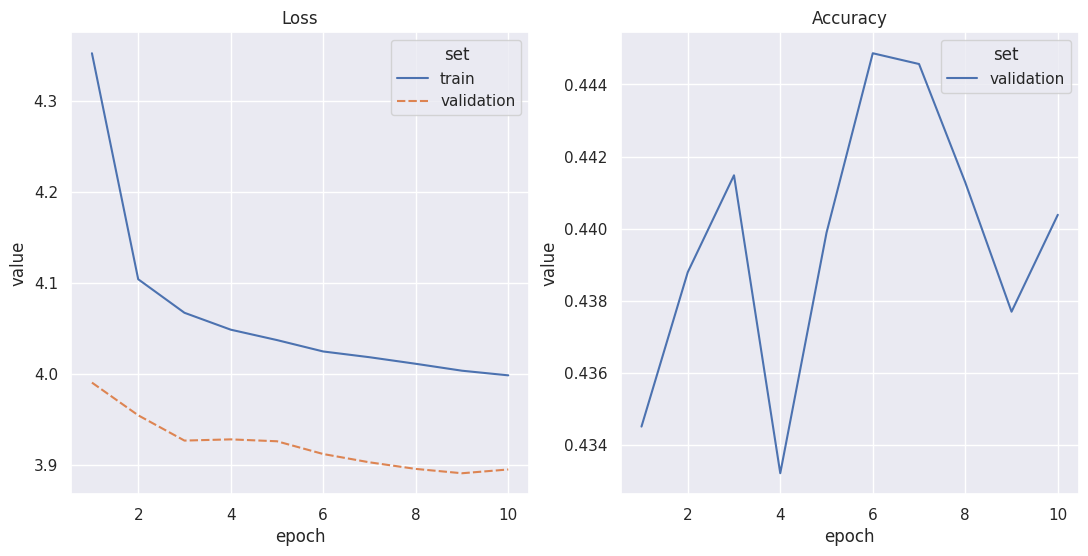

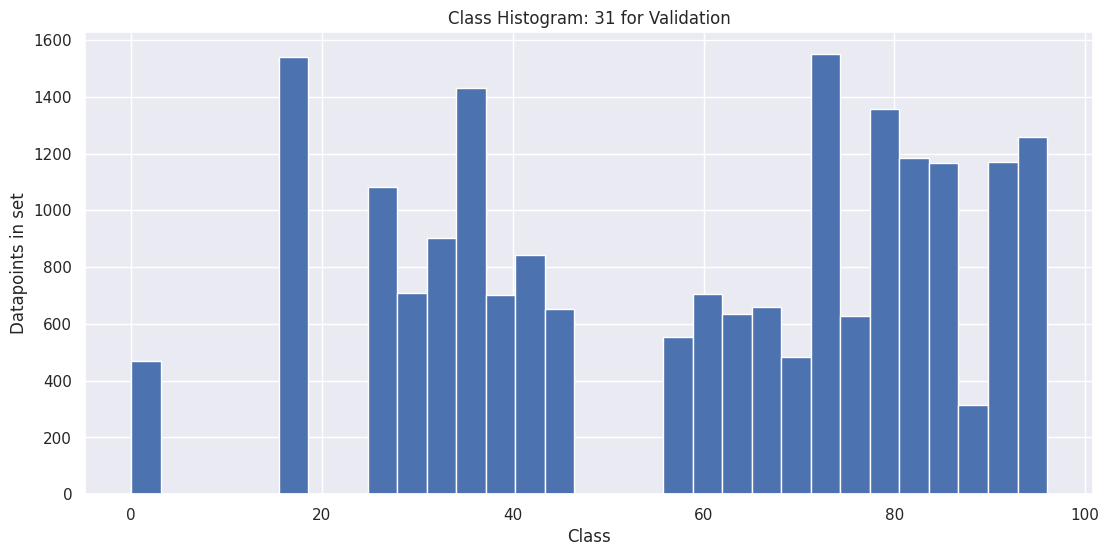

Class list:  [(0.0, 468), (17.0, 706), (18.0, 834), (27.0, 1084), (30.0, 710), (33.0, 902), (36.0, 782), (37.0, 650), (38.0, 702), (41.0, 842), (44.0, 654), (58.0, 554), (61.0, 706), (63.0, 634), (68.0, 660), (71.0, 482), (72.0, 476), (73.0, 568), (74.0, 506), (77.0, 628), (78.0, 758), (79.0, 600), (82.0, 698), (83.0, 486), (85.0, 410), (86.0, 756), (88.0, 314), (90.0, 798), (92.0, 372), (95.0, 430), (96.0, 830)]
============================== EPOCH 11 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 11, Learning Rate: 0.00194, Epoch time: 457.91 seconds
Loss: 3.992, Valid Loss: 3.8873, NMI: 0.8108, AMI: 0.0515, ARI: 0.0405, ACC: 0.4416, 
============================== EPOCH 12 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 12, Learning Rate: 0.00157, Epoch time: 457.75 seconds
Loss: 3.985, Valid Loss: 3.8806, NMI: 0.8120, AMI: 0.0490, ARI: 0.0380, ACC: 0.4435, 
============================== EPOCH 13 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 13, Learning Rate: 0.00121, Epoch time: 458.13 seconds
Loss: 3.982, Valid Loss: 3.8823, NMI: 0.8108, AMI: 0.0447, ARI: 0.0345, ACC: 0.4404, 
============================== EPOCH 14 ==============================


Validation: 100%|██████████| 157/157 [01:21<00:00,  1.91it/s]


Epoch 14, Learning Rate: 0.00089, Epoch time: 462.60 seconds
Loss: 3.977, Valid Loss: 3.8783, NMI: 0.8115, AMI: 0.0450, ARI: 0.0343, ACC: 0.4428, 
============================== EPOCH 15 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.08it/s]


Epoch 15, Learning Rate: 0.00061, Epoch time: 456.31 seconds
Loss: 3.973, Valid Loss: 3.8720, NMI: 0.8139, AMI: 0.0517, ARI: 0.0404, ACC: 0.4467, 


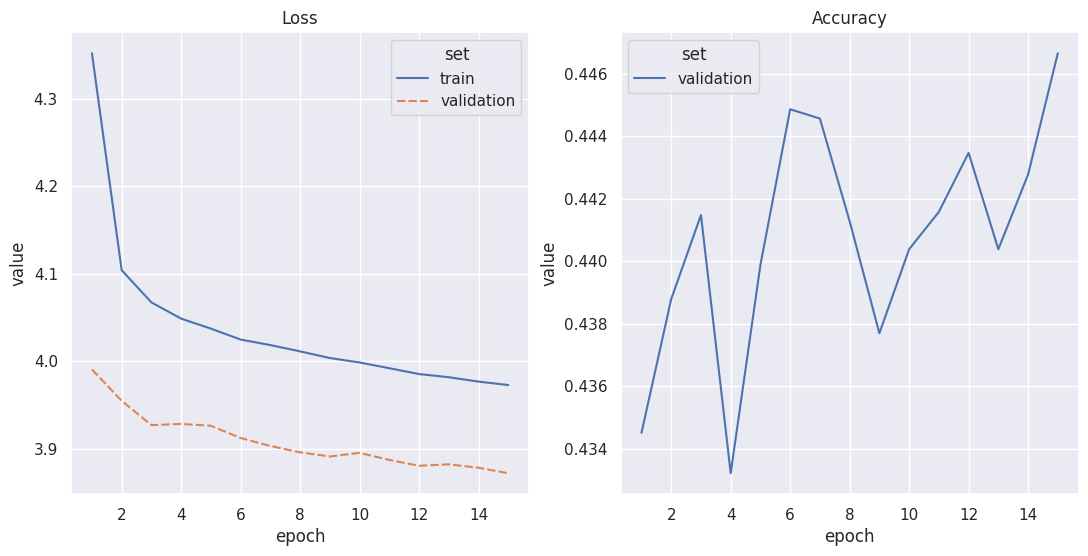

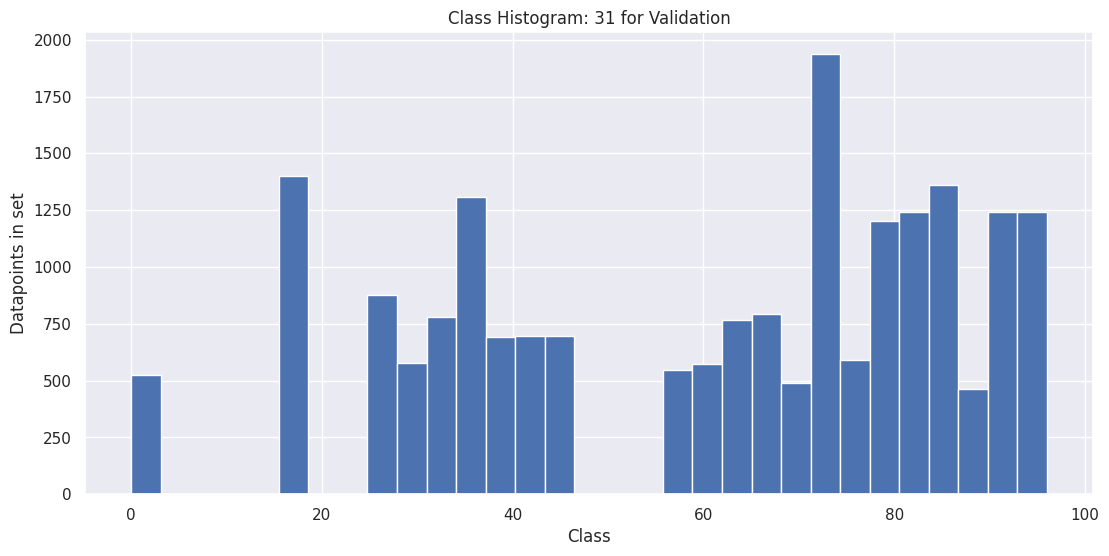

Class list:  [(0.0, 524), (17.0, 704), (18.0, 698), (27.0, 878), (30.0, 576), (33.0, 780), (36.0, 712), (37.0, 598), (38.0, 692), (41.0, 698), (44.0, 696), (58.0, 546), (61.0, 574), (63.0, 768), (68.0, 792), (71.0, 490), (72.0, 664), (73.0, 652), (74.0, 620), (77.0, 590), (78.0, 668), (79.0, 536), (82.0, 716), (83.0, 526), (85.0, 512), (86.0, 848), (88.0, 462), (90.0, 648), (92.0, 592), (95.0, 450), (96.0, 790)]
============================== EPOCH 16 ==============================


Validation: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


Epoch 16, Learning Rate: 0.00038, Epoch time: 462.42 seconds
Loss: 3.972, Valid Loss: 3.8716, NMI: 0.8120, AMI: 0.0483, ARI: 0.0378, ACC: 0.4442, 
============================== EPOCH 17 ==============================


Validation: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


Epoch 17, Learning Rate: 0.00020, Epoch time: 462.86 seconds
Loss: 3.966, Valid Loss: 3.8703, NMI: 0.8115, AMI: 0.0511, ARI: 0.0405, ACC: 0.4426, 
============================== EPOCH 18 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 18, Learning Rate: 0.00007, Epoch time: 456.62 seconds
Loss: 3.966, Valid Loss: 3.8704, NMI: 0.8119, AMI: 0.0507, ARI: 0.0398, ACC: 0.4443, 
============================== EPOCH 19 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.08it/s]


Epoch 19, Learning Rate: 0.00001, Epoch time: 456.47 seconds
Loss: 3.965, Valid Loss: 3.8693, NMI: 0.8124, AMI: 0.0487, ARI: 0.0383, ACC: 0.4449, 
============================== EPOCH 20 ==============================


Validation: 100%|██████████| 157/157 [01:15<00:00,  2.07it/s]


Epoch 20, Learning Rate: 0.00000, Epoch time: 456.61 seconds
Loss: 3.970, Valid Loss: 3.8701, NMI: 0.8123, AMI: 0.0503, ARI: 0.0397, ACC: 0.4451, 


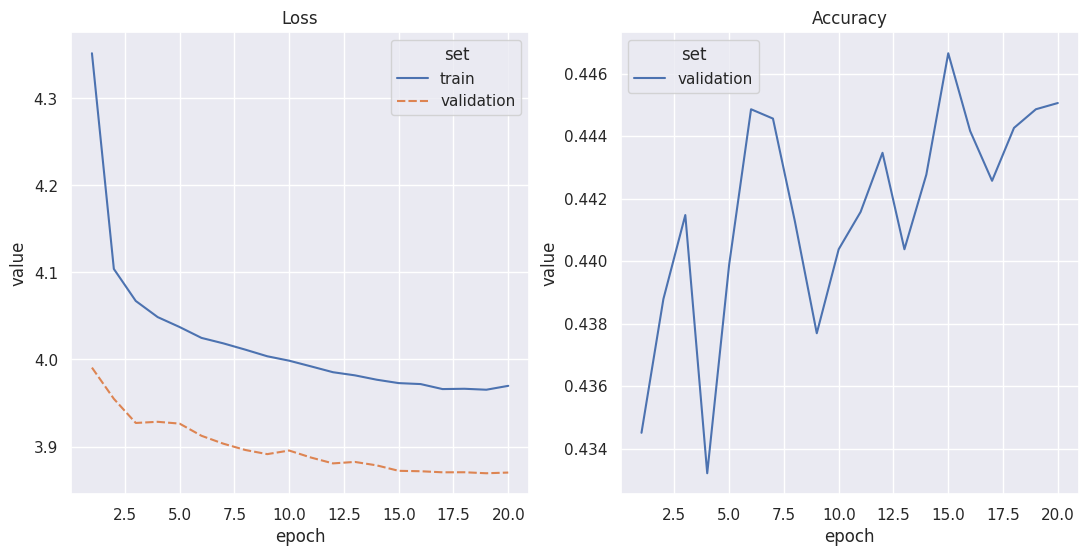

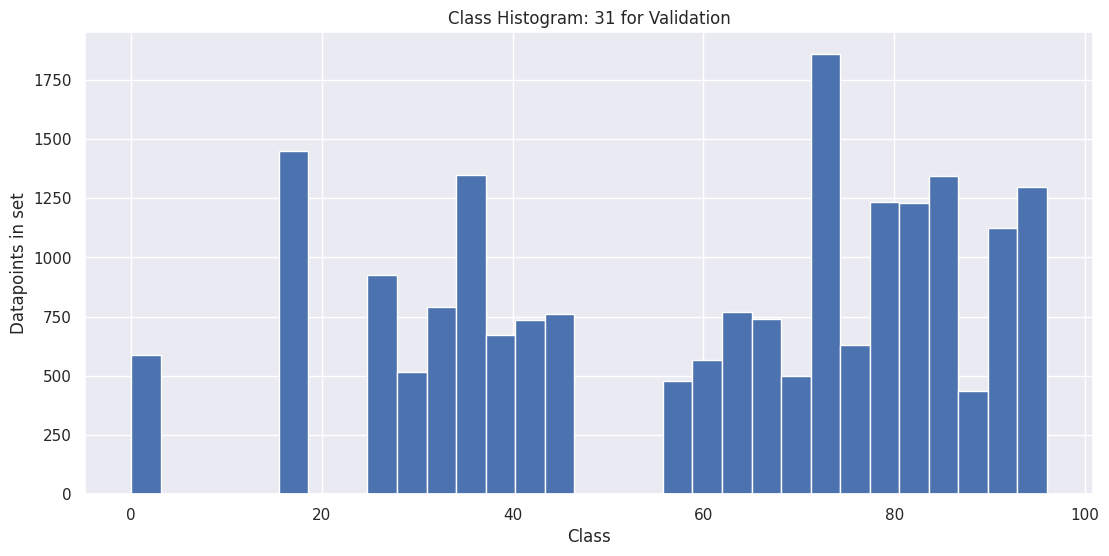

Class list:  [(0.0, 588), (17.0, 706), (18.0, 742), (27.0, 924), (30.0, 518), (33.0, 790), (36.0, 740), (37.0, 606), (38.0, 674), (41.0, 736), (44.0, 762), (58.0, 480), (61.0, 568), (63.0, 768), (68.0, 742), (71.0, 498), (72.0, 626), (73.0, 674), (74.0, 558), (77.0, 630), (78.0, 766), (79.0, 470), (82.0, 696), (83.0, 534), (85.0, 520), (86.0, 824), (88.0, 438), (90.0, 606), (92.0, 520), (95.0, 436), (96.0, 860)]

<<<<<<<<<<<<<<<<<<<<<<<<<< FINISHED 9503.11s >>>>>>>>>>>>>>>>>>>>>>>>>>
Model: "pretrained_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 100)               24138980  
                                                                 
Total params: 24,138,980
Trainable params: 550,756
Non-trainable params: 23,588,224
_________________________________________________________________


In [12]:
# Create a data recorder and fit the data
recorder = sc.DataRecorder()

# Instansiate loss function
loss_object_test = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Instansiate SelfClassifier loss function
loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                    n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
# Instansiate optimizer 
optimizer = config['OPTIM']
decay_steps = len(train_ds)*config['EPOCHS']
optimizer.learning_rate = tf.keras.optimizers.schedules.CosineDecay(
    0.005, decay_steps, alpha=0.0, name=None
)

#optimizer.learning_rate = sc.lr_schedular(config, config['LR_SCHED'],len(train_ds))

# Select backbone 
backbone = "ResNet50"
activation = "selu"

# Create an instance of the model
model = PretrainedModel(pre_model=backbone,
                         activation=activation,
                         input_shape=config['IMAGE_SHAPE'],
                         output_shape=config['CLASS_COUNT'])

learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                             loss_object_train=loss_object_train,
                             loss_object_test=loss_object_test,
                             recorder=recorder)
# Train the model
learner.fit(config=config, train_ds=train_ds,
                   test_ds=test_ds, plot_every=5)
model.summary()

In [ ]:
Epoch 100, Learning Rate: 0.00000, Epoch time: 44.60 seconds
Loss: 2.949, Valid Loss: 3.2299, NMI: 0.7990, AMI: 0.0597, ARI: 0.0467, ACC: 0.4341, 

In [ ]:
Epoch 100, Learning Rate: 0.00000, Epoch time: 45.32 seconds
Loss: 3.044, Valid Loss: 3.3234, NMI: 0.7902, AMI: 0.0507, ARI: 0.0381, ACC: 0.4162, 

## Run study

In [ ]:
def objective(trial):
    # Create a data recorder and fit the data
    recorder = sc.DataRecorder()
    
    # Instansiate loss function
    loss_object_test = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # Instansiate SelfClassifier loss function
    loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                        n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
    # Instansiate optimizer 
    optimizer = tf.keras.optimizers.Adam()
    decay_steps = len(train_ds)*config['EPOCHS']
    
    learning_rate = trial.suggest_float("learning_rate", 
                                  config['MAX_LR']*0.01, config['MAX_LR'])
    optimizer.learning_rate = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, decay_steps, alpha=0.0, name=None
    )
    
    # Select backbone 
    backbone = trial.suggest_categorical('backbone',[
        "ResNet50", "EfficientNetB0", "EfficientNetB1", "MobileNet"])
    activation = trial.suggest_categorical('activation', [
        "linear", "relu", "selu"])
    
    # Create an instance of the model
    model = sc.PretrainedModel(pre_model=backbone,
                               activation=activation,
                               input_shape=config['IMAGE_SHAPE'],
                               output_shape=config['CLASS_COUNT'])

    learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                                 loss_object_train=loss_object_train,
                                 loss_object_test=loss_object_test,
                                 recorder=recorder)
    # Train the model
    return learner.fit(config=config, train_ds=train_ds,
                       test_ds=test_ds, plot_every=5)

In [ ]:
import logging
import sys
import optuna

# Add stream handler of stdout to show the messages
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study_name = "cifar100-backbone-study"  # Unique identifier of the study.
storage_name = "sqlite:///studies/{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, storage=storage_name, 
                            directions=["minimize", "maximize"],
                            load_if_exists=True)

In [ ]:
study.optimize(objective, n_trials=30)

## Plot Final Metrics

In [ ]:
print(f"Number of trials: {len(study.trials)}")

trial_with_smallest_loss = min(study.best_trials, key=lambda t: t.values[0])
print(f"Trial with smallest loss: ")
print(f"\tnumber: {trial_with_smallest_loss.number}")
print(f"\tparams: {trial_with_smallest_loss.params}")
print(f"\tvalues: {trial_with_smallest_loss.values}")
print()

trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
print(f"Trial with highest accuracy: ")
print(f"\tnumber: {trial_with_highest_accuracy.number}")
print(f"\tparams: {trial_with_highest_accuracy.params}")
print(f"\tvalues: {trial_with_highest_accuracy.values}")

In [ ]:
optuna.visualization.plot_pareto_front(study, target_names=["Loss", "Accuracy"])

In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[0], target_name="Loss"
)

In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[1], target_name="Accuracy"
)

In [ ]:
import plotly